In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
def plot_generator(data_path):
    file = pd.read_excel(data_path,parse_dates=['기간'])
    temp = file.sort_values(by=['기간'], axis=0)[:-2].reset_index(drop = True)
    #temp = temp.loc[(temp.평잔수익률 != 0) | (temp.KOSPI수익률 !=0) | (temp.index == 0)]
    file = temp.reset_index(drop = True)
    temp = file['평잔수익률']/100+1
    file['QVI'] = temp.cumprod()
    temp = file['KOSPI수익률']/100+1
    file['KOSPI'] = temp.cumprod()
    temp = file['KOSPI수익률']/100+1
    file['KOSPI'] = temp.cumprod()
    return_data = file[['기간','QVI','KOSPI']].rename(columns={'기간':'Date'})
    return_data = return_data.set_index(['Date'])
    return_data.index = pd.to_datetime(return_data.index)
    fig, ax = plt.subplots(figsize=(25, 10))
    fig.autofmt_xdate()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    ax.set_title('QVI Performance',size=20)
    ax = plt.plot(return_data.index,return_data['QVI'],lw=5,label = 'QVI')
    ax = plt.plot(return_data.index,return_data['KOSPI'],lw=5,label = 'KOSPI')
    plt.xlabel('Date',size=15)
    plt.ylabel('Return',size=15)
    plt.legend(loc='upper right')
    plt.savefig('return.png')

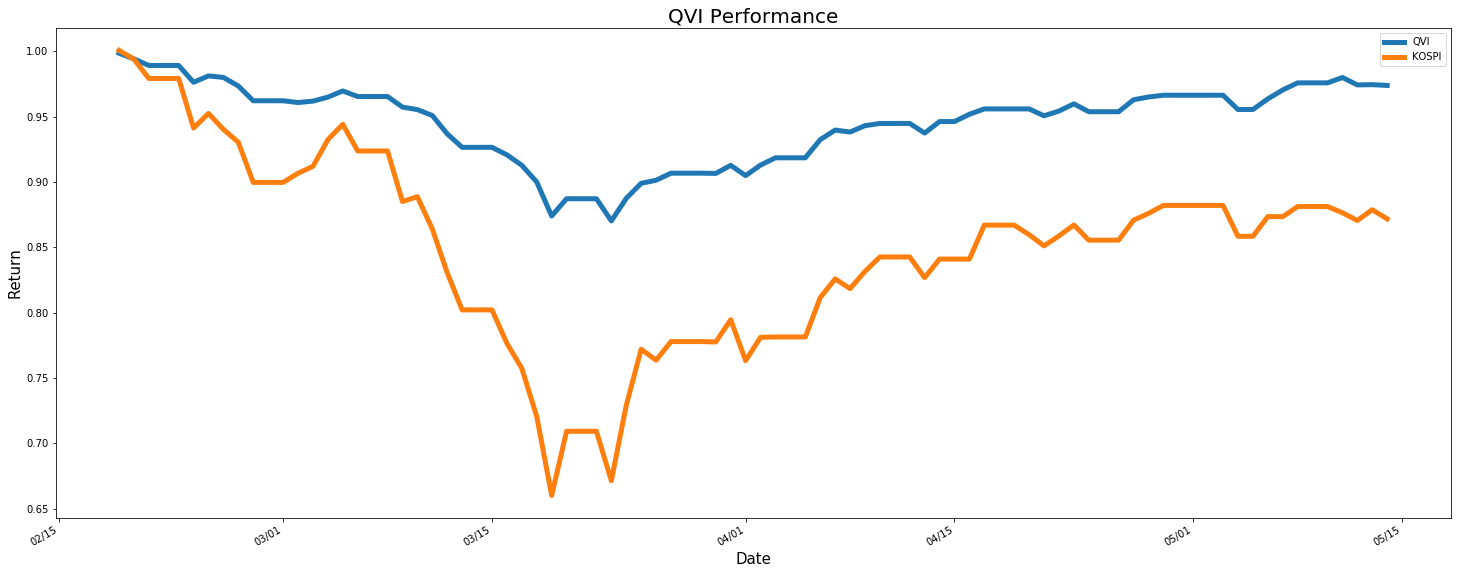

In [10]:
#엑셀로 된 Data_Path만 입력!!
plot_generator('test2.xls')